---
title: "`Autogluon`의 시작"
author: "강신성"
date: "2023-12-02"
categories: [autogluon]
---




> `autogluon`을 이용하여 자료분석을 해보자!

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics  ## 스코어 계산??

import pickle  ## 이건 뭐임?
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto  ## eda과정??

#---#
import warnings
warnings.filterwarnings('ignore')

## 2. 퓨어 모델 적합

**`x`와 `y`의 관계만 있는 데이터...**

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})

<Axes: xlabel='temp', ylabel='sales'>

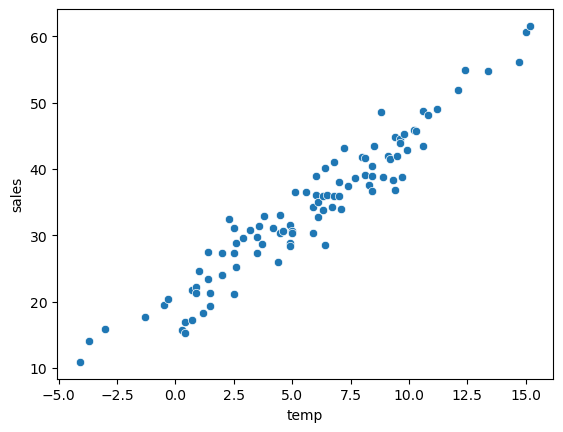

In [3]:
sns.scatterplot(df_train, x = 'temp', y = 'sales')

> 퓨어한 아이스크림 데이터...

### **A. `sklearn`에서 맨날 쓰던 코드**
---




In [7]:
## step 1 -- pass 필요없다!!
## step 2
predictr = TabularPredictor(label = 'sales')  ## target variable의 column name을 넣어줌
## step 3
predictr.fit(df_train, num_gpus = 1)  ## X, y로 넣을 필요도 없음. gpu 알아서 쓰긴 하는데 몇 개 쓸건지 명시 가능
## step 4
yhat = predictr.predict(df_train)  ## X만 넣을 필요도 없음.

No path specified. Models will be saved in: "AutogluonModels\ag-20231202_071357\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20231202_071357\"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   57.85 GB / 255.01 GB (22.7%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (61.561043278721556, 10.90026146402572, 33.97342, 10.63375)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Avail

[1000]	valid_set's rmse: 5.45375
[2000]	valid_set's rmse: 5.40245


	-5.3708	 = Validation score   (-root_mean_squared_error)
	0.2s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-4.4041	 = Validation score   (-root_mean_squared_error)
	0.54s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-3.8364	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-4.2375	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Specified total num_gpus: 1, but only 0 are available. Will use 0 instead
	-3.7128	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.01s	 = Validation runt

> 해당 문제는 regression(회귀) 문제로 파악됐고, GPU를 사용하였다 등등... 코드 자체는 상당히 컴팩트해졌다.

> 생성되는 Autogluon 폴더에서 저장된 파라미터 등을 확인할 수 있다. 지우지 않고 두면 상당히 헤비해지므로 간간히 찾아서 지워주도록 하자.

### **B. 적합결과 시각화**
---




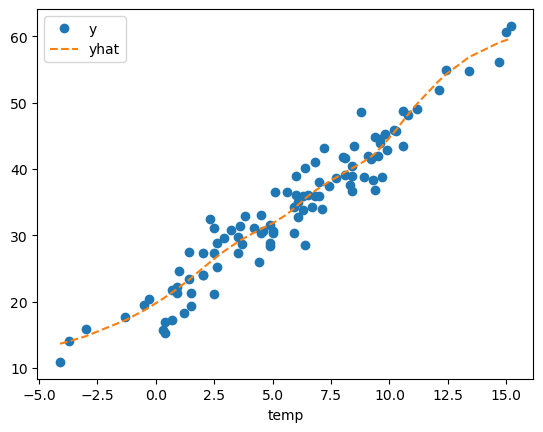

In [31]:
df_train.plot(x = 'temp', y = 'sales', marker = 'o', linestyle = '', label = 'y')  ##plot.scatter(x, y)
plt.plot(df_train['temp'], yhat, '--', color = 'C1', label = 'yhat')
plt.legend()

> 의사결정나무랑 비교해보면 되게 잘맞춘다?

### **C. 모형들 확인**
---




> 처음에 오토글론을 보았을 때, 여러 가지 모형들을 사용해서 적합하고 가장 좋은 모델을 predictor로 삼는다고 했었징...

In [34]:
predictr.leaderboard(silent = True)  ## silent = True로 데이터프레임만 볼 수 있음.

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-3.439942,0.003006,2.242829,0.000000,0.268262,2,True,12
1,NeuralNetTorch,-3.439942,0.003006,1.974566,0.003006,1.974566,1,True,10
2,NeuralNetFastAI,-3.712793,0.005999,0.882163,0.005999,0.882163,1,True,8
3,CatBoost,-3.836449,0.002001,0.417077,0.002001,0.417077,1,True,6
4,LightGBMLarge,-3.978956,0.000998,0.233002,0.000998,0.233002,1,True,11
5,XGBoost,-4.055491,0.003995,0.131009,0.003995,0.131009,1,True,9
6,KNeighborsUnif,-4.182492,0.022362,0.006002,0.022362,0.006002,1,True,1
7,ExtraTreesMSE,-4.237516,0.045743,0.553066,0.045743,0.553066,1,True,7
8,RandomForestMSE,-4.404096,0.046988,0.543597,0.046988,0.543597,1,True,5
9,KNeighborsDist,-4.650526,0.020930,0.006008,0.020930,0.006008,1,True,2


### **D. 최강모형의 `r2_score` 계산**
---




`# 방법 1`

In [35]:
_y = df_train.sales
_yhat = predictr.predict(df_train)  ## 최강 모형을 사용한 predictr
sklearn.metrics.r2_score(_y, _yhat)

0.9297829275747089

`# 방법 2`

In [36]:
_y = df_train.sales
_yhat = predictr.predict(df_train, model = 'NeuralNetTorch')  ## 어떤 모형을 사용할 지를 알아볼 수 있다.
sklearn.metrics.r2_score(_y, _yhat)

0.9297829275747089

### **E. 특정 모형의 적합값(predict) 구경**
---




`-` `XGBoost`의 적합 결과가 궁금하다...

* 먼저 스코어부터...

In [48]:
_y = df_train.sales
_yhat = predictr.predict(df_train,model='XGBoost')
sklearn.metrics.r2_score(_y,_yhat)

0.9516437954914487

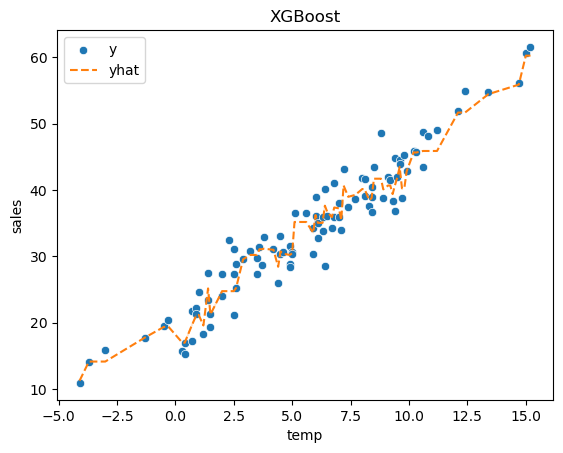

In [49]:
sns.scatterplot(df_train, x='temp', y='sales', label='y')
sns.lineplot(df_train, x='temp',y=_yhat,color='C1',linestyle='--',label='yhat')
ax = plt.gca()
ax.set_title("XGBoost")
plt.legend()

> 부스팅으로 적합한 것 같은 모형이 나오고 있당.

`-` 난 `CatBoost`가 궁금한데?!!!

In [37]:
_y = df_train.sales
_yhat = predictr.predict(df_train, model = 'CatBoost')
sklearn.metrics.r2_score(_y, _yhat)

0.9415239367518365

* 그래프로 시각화...

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    100 non-null    float64
 1   sales   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


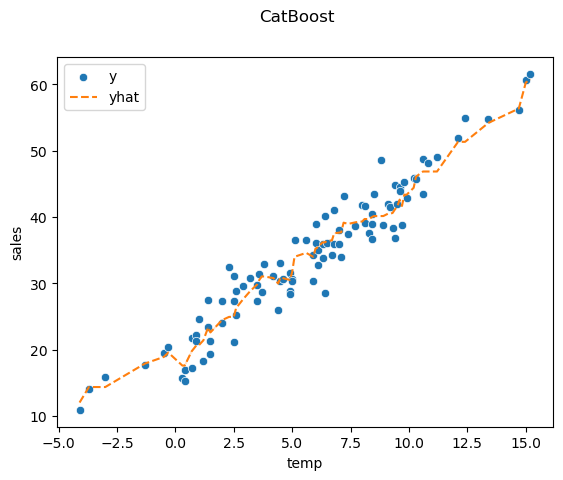

In [47]:
sns.scatterplot(df_train, x = 'temp', y = 'sales', label = 'y')
sns.lineplot(x = df_train['temp'], y = _yhat, color = 'C1', linestyle = 'dashed', label = 'yhat')
fig = plt.gcf()
fig.suptitle('CatBoost')
plt.legend()
plt.show()